In [1]:
def bbox_center_normalised(dets, pil_img):

    # pick the first/only detection
    x1, y1, x2, y2 = dets.xyxy[0]             # float32 coordinates
    cx = (x1 + x2) / 2                        # center x (pixels)
    cy = (y1 + y2) / 2                        # center y (pixels)

    W, H = pil_img.size                       # (width, height) in pixels
    return cx / W, cy / H                     # normalized 0-1


In [2]:
#Tuned to 0.372 ratio in X

def up_down(y):
    bot = (1 - y)
    if bot < 0.372:
        return True
    return False
    

In [3]:
import os
from rfdetr import RFDETRBase
from PIL import Image
import supervision as sv
import time
import torch


device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"✅ Using device: {device}")

# point 'weightsjake.pt' at your locally-saved checkpoint
weights_path = os.path.expanduser("~/downloads/weightsjake.pt")

# instantiate with your custom weights
model = RFDETRBase(
  pretrain_weights=weights_path,
  num_classes=3,            # ← match your checkpoint
)

def cycle2(j,i):
    start = time.time()
    # now do your usual inference…
    image = Image.open(os.path.expanduser(f"~/SubwaySurfers/train_screenshots/frame_00{j}{i}.jpg"))
    
    # … your existing code up to detections = model.predict(…)
    detections = model.predict(image, threshold=0.3)
    if detections.xyxy.shape[0] == 0:
        print("⚠️ No detections found")
        return 

    
    cx_norm, cy_norm = bbox_center_normalised(detections, image)

    print(f"Jake center  →  x: {cx_norm:.3f},  y: {cy_norm:.3f}")
    
    # visualise (unchanged)
    annot = sv.BoxAnnotator().annotate(image.copy(), detections)
    annot = sv.LabelAnnotator().annotate(
        annot, detections,
        [f"{cid} {conf:.2f}" for cid, conf in zip(detections.class_id, detections.confidence)]
    )
    sv.plot_image(annot)

    end = time.time()
    
    print(f"Inference time: {(end - start) * 1000:.2f} ms")

    if up_down(cy_norm):
        print('Jake is on the ground')
    else:
        print('Jake is in the air')
        


✅ Using device: mps
Loading pretrain weights


Model is not optimized for inference. Latency may be higher than expected. You can optimize the model for inference by calling model.optimize_for_inference().


 image 10


Jake center  →  x: 0.546,  y: 0.749


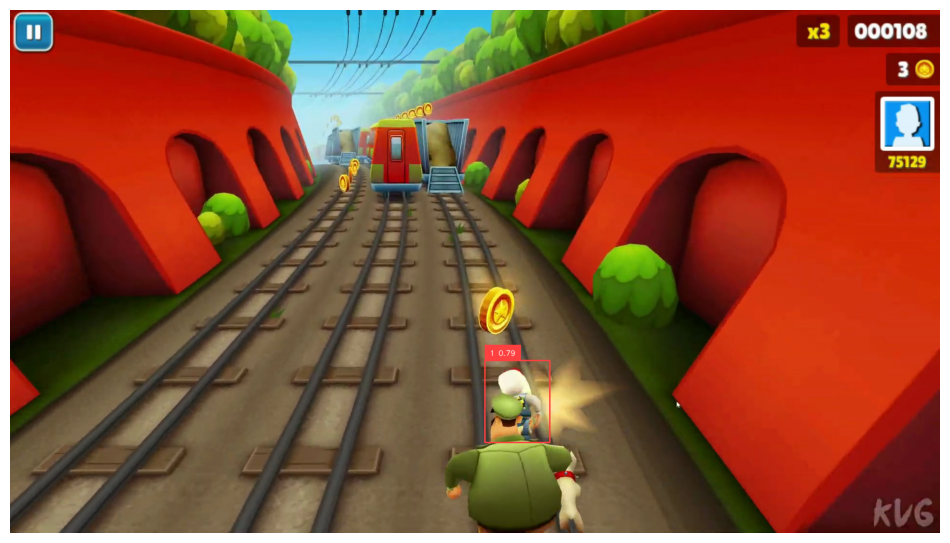

Inference time: 19373.35 ms
Jake is on the ground
 image 20
Jake center  →  x: 0.556,  y: 0.765


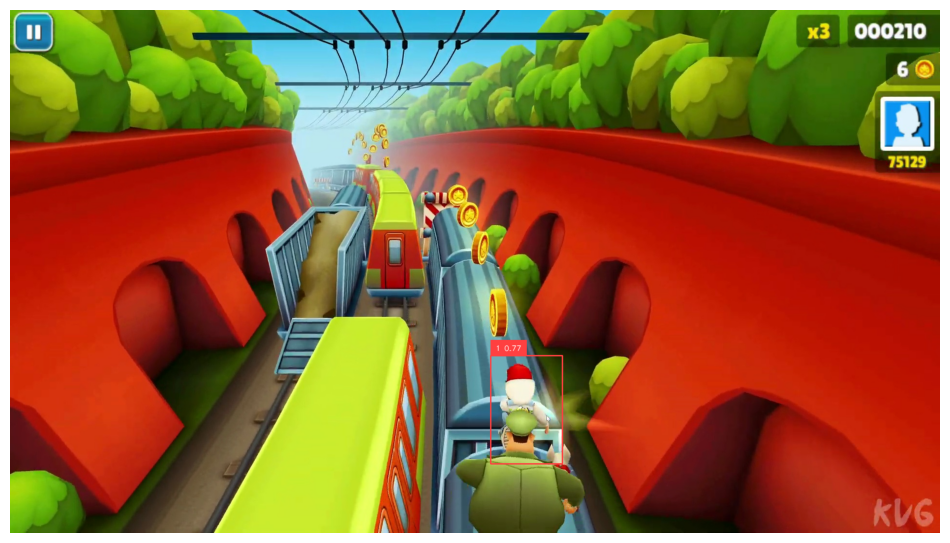

Inference time: 479.69 ms
Jake is on the ground
 image 30
Jake center  →  x: 0.488,  y: 0.427


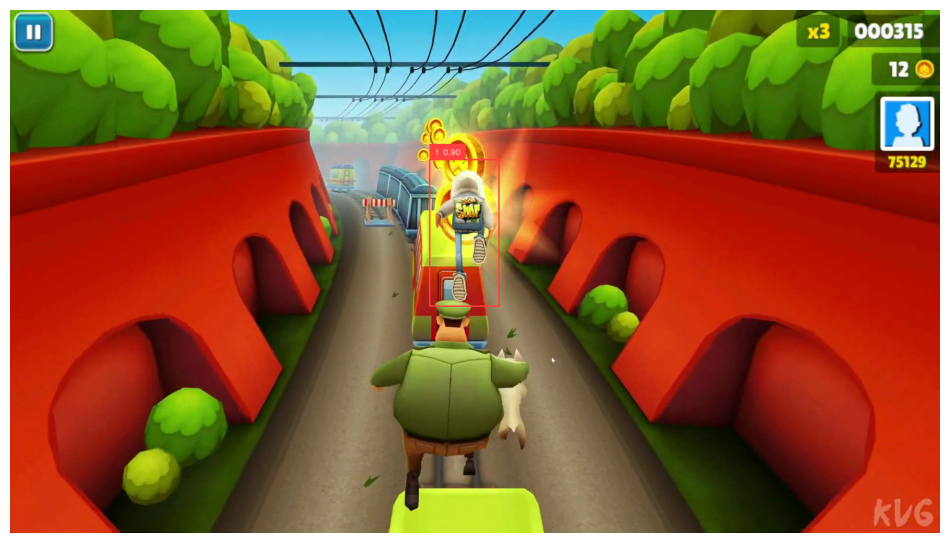

Inference time: 426.71 ms
Jake is in the air
 image 40
Jake center  →  x: 0.495,  y: 0.753


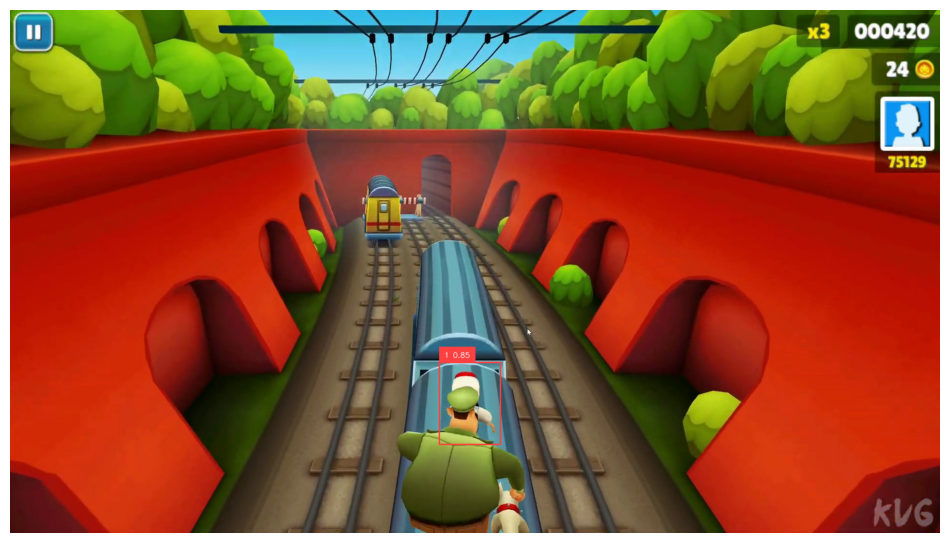

Inference time: 365.88 ms
Jake is on the ground
 image 50
Jake center  →  x: 0.561,  y: 0.669


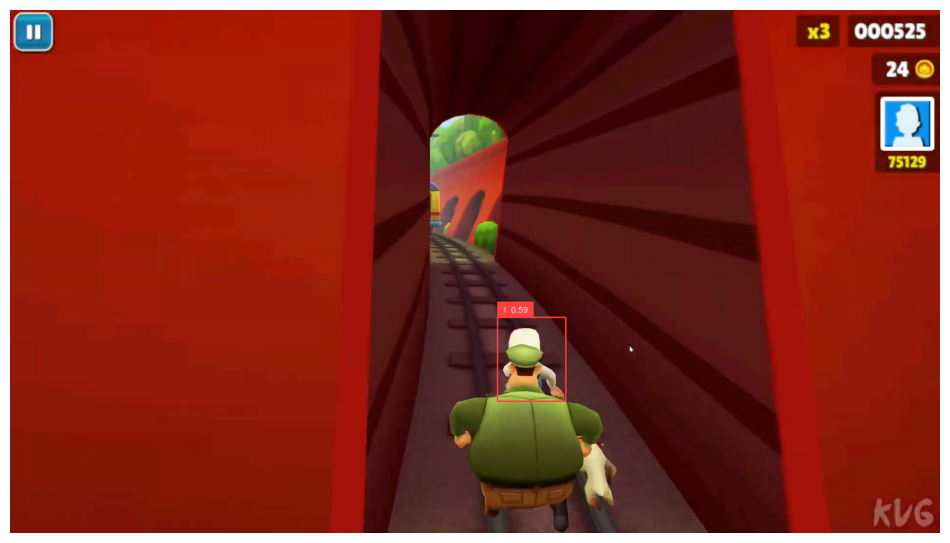

Inference time: 397.75 ms
Jake is on the ground
 image 60
Jake center  →  x: 0.481,  y: 0.792


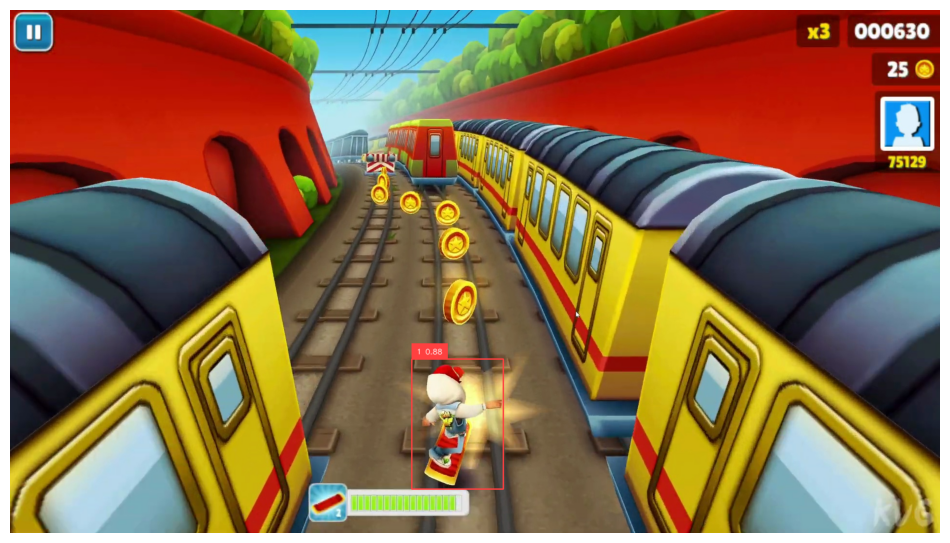

Inference time: 378.23 ms
Jake is on the ground
 image 70
Jake center  →  x: 0.442,  y: 0.802


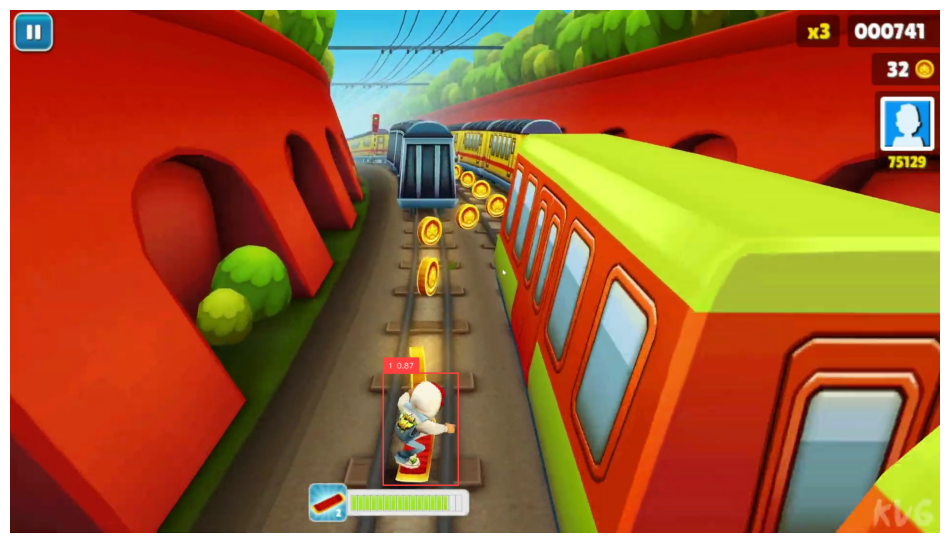

Inference time: 398.29 ms
Jake is on the ground
 image 80
Jake center  →  x: 0.506,  y: 0.800


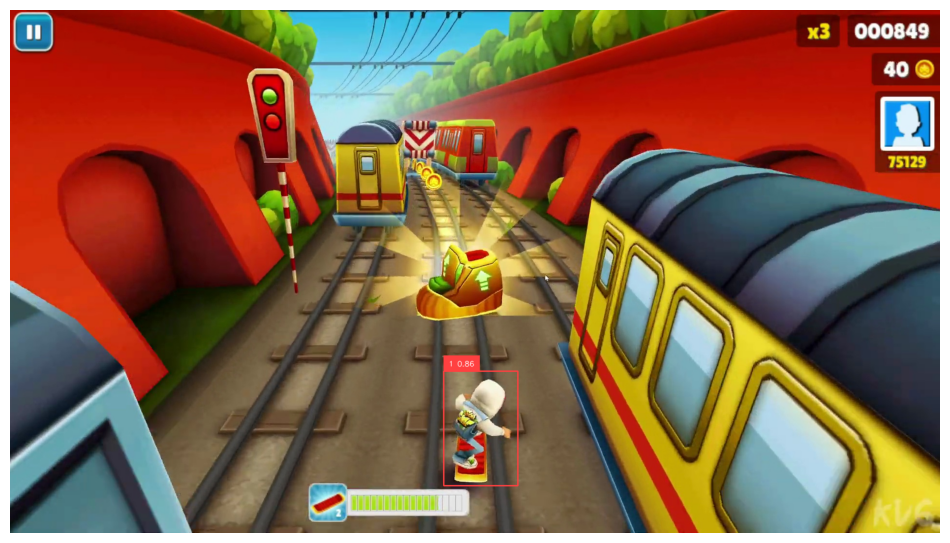

Inference time: 360.50 ms
Jake is on the ground
 image 90
Jake center  →  x: 0.514,  y: 0.794


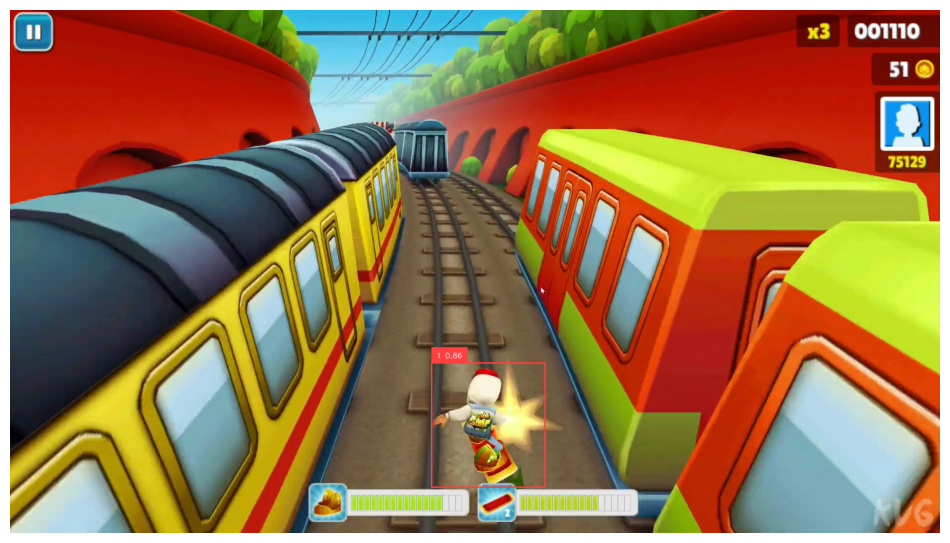

Inference time: 418.48 ms
Jake is on the ground
 image 11


KeyboardInterrupt: 

In [4]:
for j in range(3):
    for i in range(1,10):
        print(f' image {i}{j}')
        cycle2(j, i)
        